# PRiAD 3 - test zaliczający

Test obejmuje materiał z ćwiczenia PRiAD3, wymaga także znajmości zagadnień z wcześniejszych ćwiczeń.

In [435]:
#Zaimportuję potrzebne biblioteki do wszystkich zadań
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Zmienię sposób wyświetlania danych zmiennoprzecinkowych tak, aby zaokrąglane były do dwóch miejsc po przecinku. To dla czystej estetyki i czytelności.
pd.options.display.float_format = "{:.2f}".format 


> **Zadanie 1** Napisz funkcję zliczającą brakujące dane w ramce będącej jej argumentem. Funkcja powinna zwracać dwie listy (lub wektory albo słowniki) - pierwsza zawierające liczby braków w kolejnych obiektach (wiersze), druga dla kolejnych atrybutów (kolumny). Oprócz kodu funkcji napisz kod testujący jej działanie.

In [436]:
# miejsce na rozwiązanie zadania
def getShortagesList(dataFrame):
    columnsShortagesList = []
    for (name, value) in dataFrame.iteritems():
        columnsShortagesList.append( dataFrame[name].isnull().sum() )

    rowsShortagesList = []
    for index, rows in dataFrame.iterrows():
        rowsShortagesList.append( dataFrame.iloc[index].isnull().sum() )

    shortagesLists = [columnsShortagesList, rowsShortagesList]
    return shortagesLists


In [437]:
# Test napisanej funkcji:
import random
random.seed(16_11_2020)

frame = pd.DataFrame(
    np.random.randn(10,4),
    columns = list(['Kolumna 1', 'Kolumna 2', 'Kolumna 3', 'Kolumna 4'])
)

for k in range(1, 15):
    x = 'Kolumna ' + str(random.randint(2, 4))
    y = random.randint(0, 9)

    frame.at[y, x] = np.nan

print(frame)
getShortagesList(frame)

   Kolumna 1  Kolumna 2  Kolumna 3  Kolumna 4
0      -0.45       1.35      -0.20        nan
1      -1.30       1.34        nan       1.16
2      -1.15        nan       0.58        nan
3       0.85        nan       0.83        nan
4       0.29      -0.06       0.33        nan
5       1.25       0.83        nan      -3.06
6      -0.27        nan        nan       0.33
7       1.54       0.58        nan        nan
8      -0.36      -1.17       1.15      -1.13
9      -0.61      -1.81       1.13       0.74


[[0, 3, 4, 5], [1, 1, 2, 2, 1, 1, 2, 2, 0, 0]]

> **Zadanie 2** W pliku `pasazerowie_lot.xls` zawarte są dane o liczbie pasażerów samolotów w latach 2005-16 w państwach należących do Unii Europejskiej oraz z nią stowarzyszonych. Dane pochodzą z [serwisu internetowego EUROSTAT-u](http://ec.europa.eu/eurostat/data/database). Wykonaj następujące zadania:
* wczytaj plik 
* zastanów się, jaka jest najwygodniesza postać ramki danych do dalszego przetwarzania - przekształć dane do tej postaci
* usuń wszystkie obiekty, w których występuje choć jeden brak
* narysuj wykres słupkowy pokazujący łączną liczbę przewiezionych pasażerów z podziałem na lata, słupki powinny być posortowane od najkrótszego (najmniej pasażerów), do najdłuższego (najwięcej przewiezionych pasażerów)
* znajdź państwa o największym i najmniejszym bezwzględnym przyroście liczby pasażerów w całym obserwowanym okresie
* znajdź lata o największym i najmniejszym przyroście liczby pasażerów w Polsce

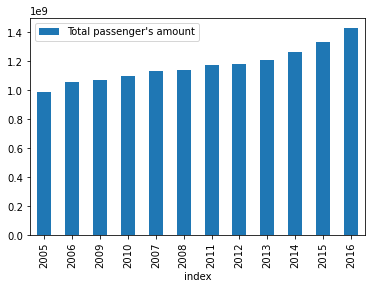

In [438]:
filename = "pasazerowie_lot.xls"
airlinesData = pd.read_excel(filename, header = 2)

airlinesData.index = airlinesData['geo\\time'].rename('Country')
airlinesData = airlinesData.drop(columns = ['geo\\time'])

airlinesData = airlinesData.dropna()

totalPassengers = airlinesData[1:].sum(axis = 0).reset_index(name ='Total passenger\'s amount')
sortedTotalPassengers = totalPassengers.sort_values(by = 'Total passenger\'s amount')
sortedTotalPassengers.plot.bar(rot = 90, x = 'index', y = 'Total passenger\'s amount')

In [439]:
eachCountryAbsoluteIncrements = pd.DataFrame(columns = ['Country', 'Absolute Increment'])

firstYearColumnName = airlinesData.columns[1]
lastYearColumnName = airlinesData.columns[len(airlinesData.columns) - 1]

for index, rows in airlinesData.iterrows():
        countryName = index

        firstValue = airlinesData[firstYearColumnName][index]
        secondValue = airlinesData[lastYearColumnName][index]
        absoluteIncrement = secondValue - firstValue

        newRecord = pd.DataFrame({
            "Country" : [countryName], 
            "Absolute Increment" : [absoluteIncrement]
        })
        eachCountryAbsoluteIncrements = eachCountryAbsoluteIncrements.append(newRecord[0:])

sortedCountriesIncrements = eachCountryAbsoluteIncrements.sort_values(by = 'Absolute Increment')

biggestIncrementCountry = sortedCountriesIncrements.iloc[-1]
smallestIncrementCountry = sortedCountriesIncrements.iloc[0]
print("Kraj z największym przyrostem pasażerów: ", biggestIncrementCountry['Country'])
print("Kraj z najmniejszym przyrostem pasażerów: ", smallestIncrementCountry['Country'])

Kraj z największym przyrostem pasażerów:  Germany
Kraj z najmniejszym przyrostem pasażerów:  Slovakia


In [440]:
country = 'Poland'
polandData = airlinesData.loc[country]

polandAbsoluteIncrements = pd.DataFrame(
    columns = list(['Previous year', 'Current year', 'Absolute increment'])
)

firstIndex = 1
lastIndex = polandData.count()
for index in range(firstIndex, lastIndex):
    absoluteIncrement = polandData.values[index] - polandData.values[index - 1]
    newRecord = pd.DataFrame({
        'Previous year':[polandData.index[index - 1]],
        'Current year':[polandData.index[index]],
        'Absolute increment':[absoluteIncrement]
    })
    polandAbsoluteIncrements = polandAbsoluteIncrements.append(newRecord)

sortedPolandAbsoluteIncrements = polandAbsoluteIncrements.sort_values(by = 'Absolute increment')
biggestIncrementYearForPoland = sortedPolandAbsoluteIncrements.iloc[-1]
smallestIncrementYearForPoland = sortedPolandAbsoluteIncrements.iloc[0]
print("Rok z największym przyrostem bezwględnym pasażerów dla Polski: ", biggestIncrementYearForPoland['Current year'])
print("Rok z najmniejszym przyrostem bezwględnym pasażerów dla Polski: ", smallestIncrementYearForPoland['Current year'])

Rok z największym przyrostem bezwględnym pasażerów dla Polski:  2006
Rok z najmniejszym przyrostem bezwględnym pasażerów dla Polski:  2009


> **Zadanie 3** Wczytaj dane dowolnego z dwóch plików zawierających kursy walut. Wykorzystujac miary tendencji centralnej oraz miary rozrzutu określ dla każdej waluty w którym półroczu którego roku (rozważ jedynie półrocza, dla których znane są wszystkie kursy) kurs był najwyższy, najniższy (biorąc pod uwagę jego wartość średnią w danym okresie) oraz wykazywał największą zmienność.

In [441]:
filename = 'waluty1.xls'
currencyData = pd.read_excel(filename)
currencyData = currencyData.dropna()

currencyData = currencyData.drop(columns = 'dzien')
currencyDataInMonths = currencyData.groupby(['rok', 'mies']).mean()

years = []
currentYear = np.nan
for index, row in currencyDataInMonths.iterrows():
    if(row.name[0] != np.nan and row.name[0] != currentYear):
        currentYear = row.name[0]
        years.append(currentYear)

currencies = currencyData.columns[2:]
halfYearsDataAvg = pd.DataFrame(columns = ['HalfYear', *currencies])
halfYearsDataStd = pd.DataFrame(columns = ['HalfYear', *currencies])

for year in years:
    yearData = currencyDataInMonths.loc[year, :]
    firstHalfYearData = yearData.loc[1:6]
    secondHalfYearData = yearData.loc[7:12]
    
    firstHalfYearDataAvg = firstHalfYearData.mean()  
    halfYearsDataAvg = halfYearsDataAvg.append(
        pd.DataFrame({
        'HalfYear': str(year) + "-1",
        'CHF': [firstHalfYearDataAvg.CHF],
        'USD': [firstHalfYearDataAvg.USD],
        'EUR': [firstHalfYearDataAvg.EUR],
        'JPY': [firstHalfYearDataAvg.JPY]
        })
    )
    firstHalfYearDataStd = firstHalfYearData.std()  
    halfYearsDataStd = halfYearsDataStd.append(
        pd.DataFrame({
        'HalfYear': str(year) + "-1",
        'CHF': [firstHalfYearDataStd.CHF],
        'USD': [firstHalfYearDataStd.USD],
        'EUR': [firstHalfYearDataStd.EUR],
        'JPY': [firstHalfYearDataStd.JPY]
        })
    )

    secondHalfYearDataAvg = secondHalfYearData.mean()
    halfYearsDataAvg = halfYearsDataAvg.append(
        pd.DataFrame({
        'HalfYear': str(year) + "-2",
        'CHF': [secondHalfYearDataAvg.CHF],
        'USD': [secondHalfYearDataAvg.USD],
        'EUR': [secondHalfYearDataAvg.EUR],
        'JPY': [secondHalfYearDataAvg.JPY]
        })
    )
    secondHalfYearDataStd = secondHalfYearData.std()  
    halfYearsDataStd = halfYearsDataStd.append(
        pd.DataFrame({
        'HalfYear': str(year) + "-2",
        'CHF': [firstHalfYearDataStd.CHF],
        'USD': [firstHalfYearDataStd.USD],
        'EUR': [firstHalfYearDataStd.EUR],
        'JPY': [firstHalfYearDataStd.JPY]
        })
    )

print(halfYearsDataAvg)
print(halfYearsDataStd)

  HalfYear  CHF  USD  EUR  JPY
0   2006-1 2.49 3.16 3.89 2.74
0   2006-2 2.46 3.04 3.90 2.60
0   2007-1 2.36 2.89 3.84 2.41
0   2007-2 2.25 2.64 3.72 2.29
0   2008-1 2.17 2.28 3.49 2.18
0   2008-2 2.26 2.53 3.54 2.52
0   2009-1 2.97 3.36 4.47 3.53
0   2009-2 2.76 2.88 4.19 3.14
0   2010-1 2.79 3.02 4.00 3.31
0   2010-2 3.00 3.05 4.00 3.58
  HalfYear  CHF  USD  EUR  JPY
0   2006-1 0.05 0.06 0.08 0.03
0   2006-2 0.05 0.06 0.08 0.03
0   2007-1 0.05 0.08 0.05 0.08
0   2007-2 0.05 0.08 0.05 0.08
0   2008-1 0.07 0.13 0.10 0.10
0   2008-2 0.07 0.13 0.10 0.10
0   2009-1 0.11 0.19 0.16 0.23
0   2009-2 0.11 0.19 0.16 0.23
0   2010-1 0.11 0.22 0.10 0.25
0   2010-2 0.11 0.22 0.10 0.25


In [442]:
sortedByAvgCHF = halfYearsDataAvg.sort_values(by = 'CHF')['HalfYear']
print("Półrocze, w którym CHF było największe: ", sortedByAvgCHF.iloc[-1])
print("Półrocze, w którym CHF było najmniejsze: ", sortedByAvgCHF.iloc[0])
print()

sortedByAvgUSD = halfYearsDataAvg.sort_values(by = 'USD')['HalfYear']
print("Półrocze, w którym USD było największe: ", sortedByAvgUSD.iloc[-1])
print("Półrocze, w którym USD było najmniejsze: ", sortedByAvgUSD.iloc[0])
print()

sortedByAvgEUR = halfYearsDataAvg.sort_values(by = 'EUR')['HalfYear']
print("Półrocze, w którym EUR było największe: ", sortedByAvgEUR.iloc[-1])
print("Półrocze, w którym EUR było najmniejsze: ", sortedByAvgEUR.iloc[0])
print()

sortedByAvgJPY = halfYearsDataAvg.sort_values(by = 'JPY')['HalfYear']
print("Półrocze, w którym JPY było największe: ", sortedByAvgJPY.iloc[-1])
print("Półrocze, w którym JPY było najmniejsze: ", sortedByAvgJPY.iloc[0])
print()

Półrocze, w którym CHF było największe:  2010-2
Półrocze, w którym CHF było najmniejsze:  2008-1

Półrocze, w którym USD było największe:  2009-1
Półrocze, w którym USD było najmniejsze:  2008-1

Półrocze, w którym EUR było największe:  2009-1
Półrocze, w którym EUR było najmniejsze:  2008-1

Półrocze, w którym JPY było największe:  2010-2
Półrocze, w którym JPY było najmniejsze:  2008-1



In [443]:
sortedByStdCHF = halfYearsDataStd.sort_values(by = 'CHF')['HalfYear']
print("Półrocze, w którym zmienność (odchylenie standardowe) CHF była największa: ", sortedByStdCHF.iloc[-1])

sortedByStdUSD = halfYearsDataStd.sort_values(by = 'USD')['HalfYear']
print("Półrocze, w którym zmienność (odchylenie standardowe) USD była największa: ", sortedByStdUSD.iloc[-1])

sortedByStdEUR = halfYearsDataStd.sort_values(by = 'EUR')['HalfYear']
print("Półrocze, w którym zmienność (odchylenie standardowe) EUR była największa: ", sortedByStdEUR.iloc[-1])

sortedByStdJPY = halfYearsDataStd.sort_values(by = 'JPY')['HalfYear']
print("Półrocze, w którym zmienność (odchylenie standardowe) JPY była największa: ", sortedByStdJPY.iloc[-1])

Półrocze, w którym zmienność (odchylenie standardowe) CHF była największa:  2010-2
Półrocze, w którym zmienność (odchylenie standardowe) USD była największa:  2010-2
Półrocze, w którym zmienność (odchylenie standardowe) EUR była największa:  2009-2
Półrocze, w którym zmienność (odchylenie standardowe) JPY była największa:  2010-2


> **Zadanie 4** Zmień nazwę tego skryptu na następującą "PRiAD3zal_Imię_Nazwisko.ipynb" i wgraj wgraj go do ISOD-a we wskazane miejsce, nie przekraczając wyznaczonego terminu.

*Wersja na rok. akad. 20/21*